<a href="https://colab.research.google.com/github/arumlim/eileen/blob/master/1204%2001_KOSPI_%2C%E1%84%82%E1%85%A1%E1%84%89%E1%85%B3%E1%84%83%E1%85%A1%E1%86%A8_%E1%84%89%E1%85%B5%E1%84%80%E1%85%A1%E1%86%A8%E1%84%92%E1%85%AA_%E1%84%86%E1%85%B5%E1%86%BE_%E1%84%89%E1%85%A1%E1%86%BC%E1%84%80%E1%85%AA%E1%86%AB%E1%84%80%E1%85%AA%E1%86%AB%E1%84%80%E1%85%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!pip install finance-datareader

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import FinanceDataReader as fdr

KOSPI = fdr.DataReader('KS11', '2019')
NASDAQ = fdr.DataReader('IXIC', '2019')
SnP500 = fdr.DataReader('US500', '2019')

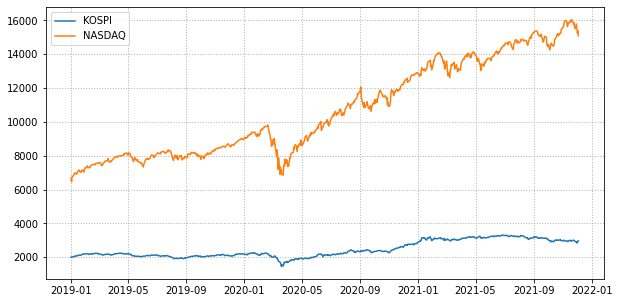

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(KOSPI['Close'], label='KOSPI')
plt.plot(NASDAQ['Close'], label='NASDAQ')
plt.legend()
plt.grid(True, color='0.7', linestyle=':', linewidth=1)

In [22]:
KOSPI_min = KOSPI['Close'].min()
NASDAQ_min = NASDAQ['Close'].min()

In [18]:
# KOSPI 최저 점의 날짜를 기준으로 지수를 계산합니다.
KOSPI_MIN_DATE = KOSPI[KOSPI['Close'] == KOSPI_min].index[0]
print(f'KOSPI 200 최저 날짜 : {KOSPI_MIN_DATE}')

KOSPI 200 최저 날짜 : 2020-03-19 00:00:00


In [21]:
KOSPI_MIN_CLOSE = KOSPI.loc[KOSPI_MIN_DATE,'Close']
NASDAQ_MIN_CLOSE = NASDAQ.loc[KOSPI_MIN_DATE,'Close']

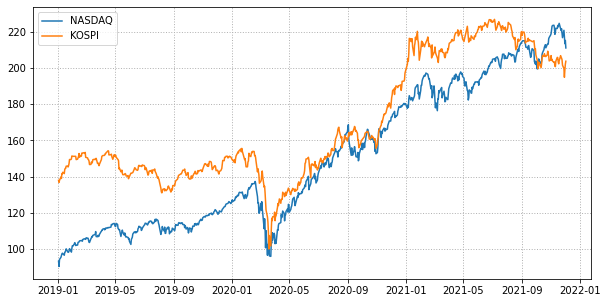

In [31]:
# 각 지수 별 최저점을 기준으로 지수화
plt.figure(figsize=(10, 5))
plt.plot(NASDAQ['Close'] / NASDAQ_MIN_CLOSE * 100, label='NASDAQ')
plt.plot(KOSPI['Close'] / KOSPI_MIN_CLOSE * 100, label='KOSPI')
plt.legend(loc=0)
plt.grid(True, color='0.7', linestyle=':', linewidth=1)

Text(0, 0.5, 'KOSPI')

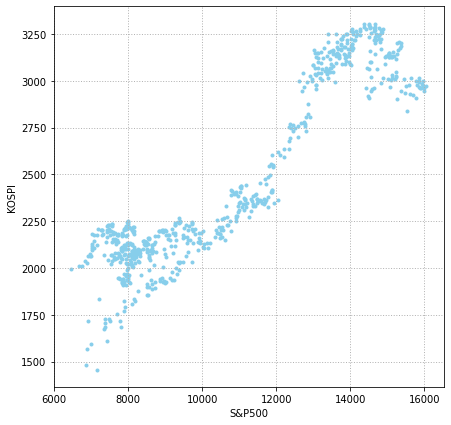

In [38]:
# 코스피와 NASDAQ 의 상관관계 (길이 맞출 필요 있음)
plt.figure(figsize=(7,7))
plt.scatter(NASDAQ['Close'],
            KOSPI['Close'], marker='.', color='skyblue')
plt.grid(True, color='0.7', linestyle=':', linewidth=1)
plt.xlabel('S&P500')
plt.ylabel('KOSPI')

In [37]:
index_concat = pd.concat([NASDAQ,KOSPI], axis = 1).dropna()
NASDAQ = index_concat.iloc[:,:6]
KOSPI = index_concat.iloc[:,6:]

Text(0, 0.5, 'KOSPI')

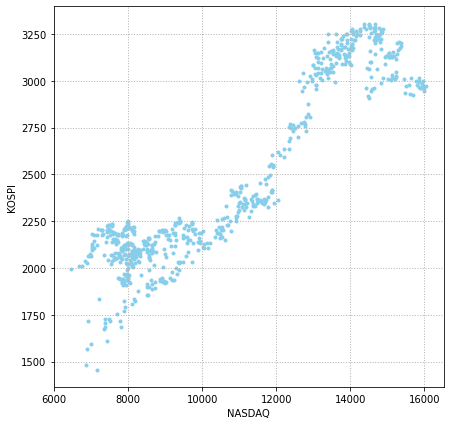

In [ ]:
# 코스피와 NASDAQ 의 상관관계 
plt.figure(figsize=(7,7))
plt.scatter(NASDAQ['Close'],
            KOSPI['Close'], marker='.', color='skyblue')
plt.grid(True, color='0.7', linestyle=':', linewidth=1)
plt.xlabel('NASDAQ')
plt.ylabel('KOSPI')

In [6]:
# 상관관계 계산
NASDAQ['Close'].corr(KOSPI['Close'])

0.9300054104520762

### Q. 관심있는 두가지 데이터를 선택하여 상관관계를 확인해보자.

In [ ]:
# # FX 환율, 1995 ~ 현재
# usdkrw = fdr.DataReader('USD/KRW', '1995-01-01') # 달러 원화
# usdeur = fdr.DataReader('USD/EUR', '1995-01-01') # 달러 유로화
# usdcny = fdr.DataReader('USD/CNY', '1995-01-01') # 달러 위엔화

# # 상품 선물 가격 데이터
# df = fdr.DataReader('NG') # NG 천연가스 선물 (NYMEX)
# df = fdr.DataReader('ZG') # 금 선물 (ICE)
# df = fdr.DataReader('ZI') # 은 선물 (ICE)
# df = fdr.DataReader('HG') # 구리 선물 (COMEX)

# # Bitcoin KRW price (Bithumbs), 2016 ~ Now
# btc = fdr.DataReader('BTC/KRW', '2016-01-01')

# # 채권 수익률
# df = fdr.DataReader('KR1YT=RR') # 1년만기 한국국채 수익률
# df = fdr.DataReader('KR10YT=RR') # 10년만기 한국국채 수익률

# df = fdr.DataReader('US1MT=X') # 1개월 만기 미국국채 수익률
# df = fdr.DataReader('US10YT=X') # 10년 만기 미국국채 수익률

# # KRX stock symbol list
# stocks = fdr.StockListing('KOSPI') # 코스피
# stocks = fdr.StockListing('KOSDAQ') # 코스닥

# # NYSE, NASDAQ, AMEX stock symbol list
# stocks = fdr.StockListing('NYSE')   # 뉴욕거래소
# stocks = fdr.StockListing('NASDAQ') # 나스닥
# stocks = fdr.StockListing('AMEX')   # 아멕스

# # S&P 500 symbol list
# sp500 = fdr.StockListing('S&P500')

# # 기타 주요 거래소 상장종목 리스트
# stocks = fdr.StockListing('SSE') # 상해 거래소
# stocks = fdr.StockListing('SZSE') # 신천 거래소
# stocks = fdr.StockListing('HKEX') # 홍콩거래소
# stocks = fdr.StockListing('TSE') # 도쿄 증권거래소
# stocks = fdr.StockListing('HOSE') # 호치민 증권거래소

In [52]:
#Bitcoin KRW price (Bithumbs), 2016 ~ Now
BTC = fdr.DataReader('BTC/KRW', '2016-01-01')
BTC.head()



,Close,Open,High,Low,Volume,Change
Date,,,,,,
2017-05-23,3206000,3104000,3281000,3081000,21580.0,0.0329
2017-05-24,4175000,3206000,4314000,3206000,34680.0,0.3022
2017-05-25,4199000,4175000,4840000,3102000,35910.0,0.0057
2017-05-26,3227000,4199000,4200000,2900000,36650.0,-0.2315
2017-05-27,3152000,3227000,3288000,2460000,33750.0,-0.0232


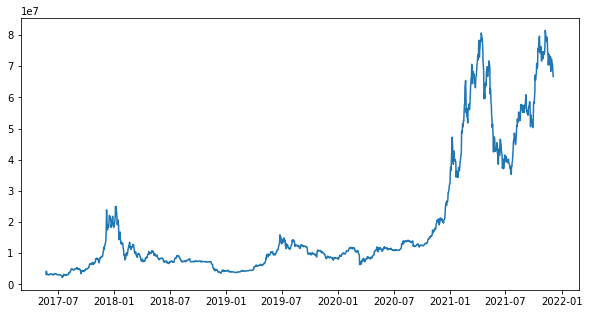

In [53]:
plt.figure(figsize=(10, 5))
plt.plot(BTC['Close'], label='BTC')

In [56]:
#FX 환율, 1995 ~ 현재
usdkrw = fdr.DataReader('USD/KRW', '2016-01-01') # 달러 원화

usdkrw.head()

,Close,Open,High,Low,Change
Date,,,,,
2016-01-01,1175.45,1175.94,1176.50,1175.19,-0.0004
2016-01-04,1190.35,1175.66,1193.23,1175.65,0.0127
2016-01-05,1190.81,1190.35,1192.80,1184.40,0.0004
2016-01-06,1200.52,1190.81,1203.80,1187.59,0.0082
2016-01-07,1197.29,1200.52,1204.70,1193.16,-0.0027


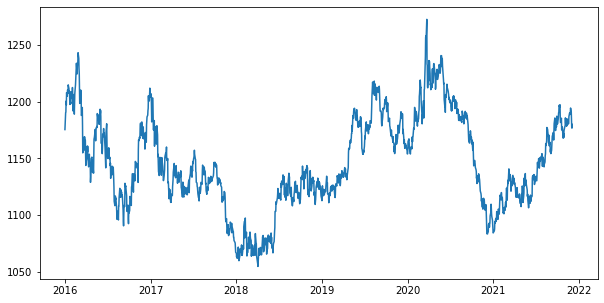

In [57]:
plt.figure(figsize=(10, 5))
plt.plot(usdkrw['Close'], label='usdkrw')

In [59]:
index_concat = pd.concat([BTC,usdkrw], axis = 1).dropna()
BTC = index_concat.iloc[:,:6]
usdkrw = index_concat.iloc[:,6:]

Text(0, 0.5, 'usdkrw')

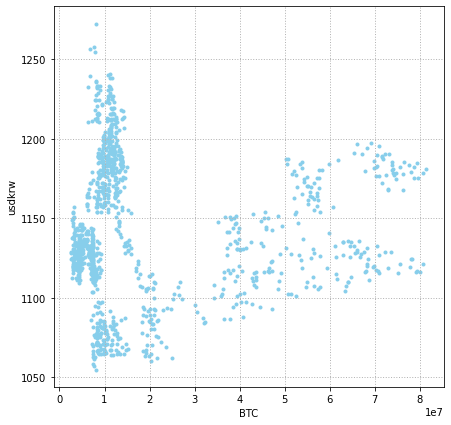

In [60]:
plt.figure(figsize=(7,7))
plt.scatter(BTC['Close'],
           usdkrw['Close'], marker='.', color='skyblue')
plt.grid(True, color='0.7', linestyle=':', linewidth=1)
plt.xlabel('BTC')
plt.ylabel('usdkrw')